# Parameter constraints

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap

from application import harmony
from application.cosmological_reading.extract_constraints import plot_likelihood

plt.style.use(harmony)

In [3]:
NG = 0  # 100
case = "partial-sky"  # "partial-sky"

storage = repo_root/"storage"/"processed"/"likelihoods"

results = np.load(storage/"posterior_{}_NG{}.npz".format(case, NG))

[2020-06-30 00:36:09 (+0:00:11) WARNING] No handles with labels found to put in legend.
[2020-06-30 00:36:09 (+0:00:11) WARNING] No handles with labels found to put in legend.


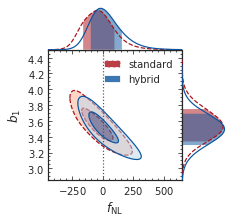

In [4]:
figure, *results = plot_likelihood(
    [result for result in results['standard']], [result for result in results['hybrid']],
    sample_points_x=[results['f_nl_std'], results['f_nl_hyb']],
    sample_points_y=[results['b_1_std'], results['b_1_hyb']],
    label_x=r'f_{\mathrm{NL}}',
    label_y=r'b_1',
    precision_x=0,
    precision_y=3,
    truth_x=NG,
    scatter_plot=False,
    cmap=['Reds', 'Blues',],
    label=['standard', 'hybrid',]
)

main, *_ = figure.axes
main.set_xticks(np.arange(-1000, 1000, 250))
main.set_yticks(np.arange(2., 6., 0.2))
main.set_xlim(-450, 650)
main.set_ylim(2.85, 4.5)
main.xaxis.set_minor_locator(AutoMinorLocator())
main.yaxis.set_minor_locator(AutoMinorLocator())

figure.savefig(repo_root/"notebooks"/"publications"/"posterior_{}_NG{}.pdf".format(case, NG))